# Crater Simulation
#### ASTR 3750 final project
###### Thor Breece

## Assumptions

* All impactors are perfectly spherical
* Impacts happening on a body with lunar mass (M = 7.35*10^22 Kg) (g = 1.62 m/s^2)
* Planetary body has no atmosphere (to eliminate drag from the equation)
* All impactors have same density
* Assume all impactors hit moon-like planet at perfect 90º angle
* Ignores decreasing probability with increasing meteor size

In [222]:
# import required libraries
import numpy as np # used for array formation
import matplotlib.pyplot as plt # used for plotting
import random as rand # used for rng generation of impactors
from math import pi # used in various equations
from PIL import Image # used to parse images by pixels
from tqdm import tqdm # used to display progress bar
import time # used to help display progress bar

In [223]:
# declaration of constants
g = 1.62
G = 6.67e-11
M_lunar = 7.35e22
p_moon = 3344

#### The next three cells are example data
##### Also used for debugging

In [224]:
# generate random impactors
impactors_radius = np.empty([1000])
impactors_mass = np.empty([1000])
impactors_velocities = np.empty([1000])
impactors_densities = np.empty([1000])
for i in range(1000):
    impactors_radius[i] = rand.randint(500, 2000) # this range always produces > 10 km craters
    impactors_densities[i] = rand.randint(1000, 5200) # density will range somewhere between near pure ice comets and fully rocky asteroids 
    impactors_velocities[i] = rand.randint(10000, 20000)
    impactors_mass[i] = ((4/3) * pi * (impactors_radius[i]) ** (2)) * (impactors_densities[i]) # mass unused in next few calculations

In [225]:
# use generated impactors to determine impact velocity
crater_diameters = np.empty([1000])

for j in range(1000):
    # the next three lines are the equation from Lecture 21 slide 13
    # D = (((v^2)/g)^1/4) * ((p_impactor/p_planet)^1/4) * ((L)^3/4)
    vel_over_g = (((impactors_velocities[j])**2) / (g)) ** (1 / 4)
    impactor_over_planet = (impactors_densities[j] / p_moon) ** (1 / 4)
    crater_diameters[j] = (vel_over_g * impactor_over_planet * ((impactors_radius[j] * 2) ** (3 / 4)))
    

In [226]:
# Printed out some data for debugging purposes
print("impact # | impactor radius (m) | impactors density (Kg/m^3) | impactor mass (Kg) | impactor velocity (m/s) | crater diameter (m)")
print("------------------------------------------------------------------------------------------------------------------------------")
for i in range(10):
    print(f'{i:8d} | {impactors_radius[i]:19.0f} | {impactors_densities[i]:26.0f} | {impactors_mass[i]:18.1e} | {impactors_velocities[i]:23.0f} | {crater_diameters[i]:15.1f}')

impact # | impactor radius (m) | impactors density (Kg/m^3) | impactor mass (Kg) | impactor velocity (m/s) | crater diameter (m)
------------------------------------------------------------------------------------------------------------------------------
       0 |                 557 |                       2256 |            2.9e+09 |                   19329 |         21535.7
       1 |                1470 |                       2026 |            1.8e+10 |                   19096 |         43146.6
       2 |                1861 |                       2452 |            3.6e+10 |                   14055 |         46337.5
       3 |                 945 |                       3600 |            1.3e+10 |                   19683 |         36309.7
       4 |                1400 |                       2599 |            2.1e+10 |                   16132 |         40688.2
       5 |                 597 |                       2579 |            3.9e+09 |                   13742 |         19

#### Using slightly adjusted algorithm, we plot craters.

 93%|█████████▎| 506.6059999999999/544 [02:31<00:11,  3.34it/s]     


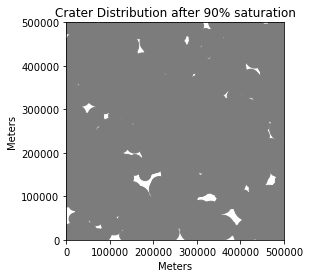

In [227]:
t1 = 0
i = 0
total = 0
saturation_list = []
saturation = 0
pixel_count = np.empty([1000])
crat_tot1 = 0
with tqdm(total = 544) as pbar:
    while(saturation < 0.9): # while < 90% saturation
        radius = rand.randint(500, 2000) # this range always produces > 10 km craters
        densities = rand.randint(1000, 5200) # density will range somewhere between near pure ice comets and fully rocky asteroids 
        velocities = rand.randint(10000, 20000)
        mass = ((4/3) * pi * (radius) ** (2)) * (densities)# mass unused in next few calculations
        vel_over_g = (((velocities)**2) / (g)) ** (1 / 4)
        impactor_over_planet = (densities / p_moon) ** (1 / 4)
        crater_diameter = (vel_over_g * impactor_over_planet * ((radius * 2) ** (3 / 4)))
        x = rand.randint(1, 500000) # random x cord
        y = rand.randint(1, 500000) # random y cord
         # Very easy way to erase earlier craters by giving fill color to craters

        fig = plt.gcf()
        ax = fig.gca()
        ax.add_patch(plt.Circle((x, y), (crater_diameter / 2), edgecolor='#7d7c7c', facecolor='#7d7c7c')) # add circle to graph

        plt.xlim(0, 500000) # x limit
        plt.ylim(0, 500000) # y limit
        plt.xlabel("Meters")
        plt.ylabel("Meters")
        if (saturation >= .24 and saturation <= .26):
            plt.title('Crater Distribution after 25% saturation')
            ax.set_aspect('equal') # make sure cirlces appear with no eccentricity
            fig.savefig('25%.png') # save img
        elif(saturation >= .49 and saturation <= .51):
            plt.title('Crater Distribution after 50% saturation')
            ax.set_aspect('equal') # ''
            fig.savefig('50%.png') # ''
        elif(saturation >= .74 and saturation <= .76):
            plt.title('Crater Distribution after 75% saturation')
            ax.set_aspect('equal') # ''
            fig.savefig('75%.png') # ''
        elif(saturation >= .89 and saturation <= .91):
            plt.title('Crater Distribution after 90% saturation')
            ax.set_aspect('equal') # ''
            fig.savefig('100%.png') # ''
        ax.set_aspect('equal')
        # uses pixels to calculate percentage of figure that is covered by craters
        fig.savefig(f'temp.png')
        im = Image.open(f'temp.png')
        pixel_colors = im.getdata()
        crater_pix = 0;
        for x in range(len(pixel_colors)):
            temp = pixel_colors[x][0] * pixel_colors[x][1] * pixel_colors[x][2]
            if (temp == 1922000): # value of r * g * b for hex color #7d7c7c
                crater_pix += 1
        saturation = round(crater_pix / 50000 , 3)
        saturation_list.append(saturation)
        t1 += 1000 # time step
        i += 1
        time.sleep(0.001)
        crat_tot1 += crater_diameter
        pbar.update(saturation)
avg_crat_m = crat_tot1 / i

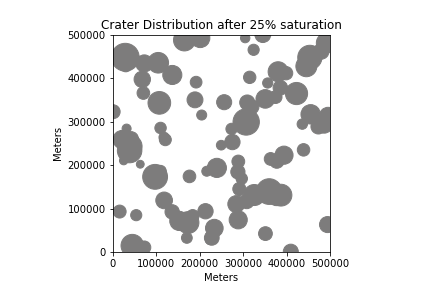

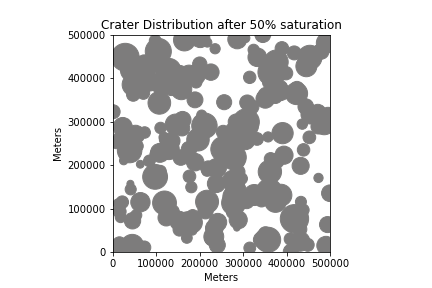

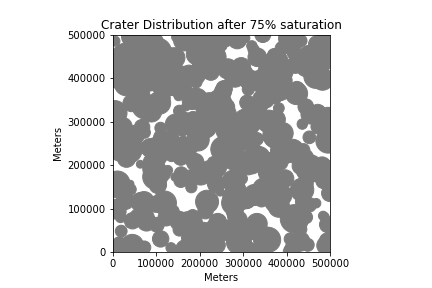

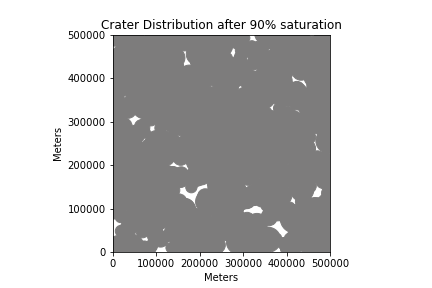

In [228]:
img1 = Image.open('25%.png')
img2 = Image.open('50%.png')
img3 = Image.open('75%.png')
img4 = Image.open('100%.png')
img1.show()
img2.show()
img3.show()
img4.show()

The runtime to saturate the plot increases exponentially as you approach 100% so decided that saturation is at 90%. 
It takes anywhere from 750,000 to 800,000 years to saturate, but can change a bit due to random number generation. 
Starting from 25%, the saturation of craters logorithmically tapers off. This is because as more of the plot is saturated, there is a heigher likelyhood that an impact occurs where there is already a crater. This is not a perfect way to detect saturation or whether a crater is visible.

Time to Saturation: 784000 years 



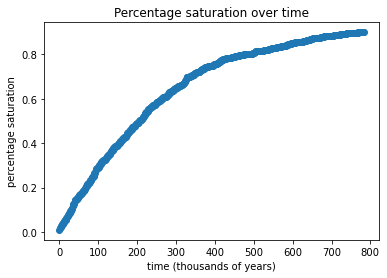

In [229]:
saturation_arr = np.array(saturation_list)
plt.scatter(range(int(t1 / 1000)), saturation_arr)
plt.xlabel("time (thousands of years)")
plt.ylabel("percentage saturation")
plt.title("Percentage saturation over time")
print(f'Time to Saturation: {t1} years \n')

Percentage saturation follows a logorithmic curve and as time goes to infinity, it reaches 100%. (Haven't checked how long it actually takes to reach 100% as it takes too long to run)

## Changed Assumption

Instead of using the moon, let's see what changes if we use the Earth!
### Assumptions
* Assume all impactors come into atmosphere at perfect 90º angle to 500 x 500 Km flat plane
* No tectonic activity happens, so crartering is not erased by tectonic activity.
* Lifeless - no erasing of craters due to biological reasons (trees covering up craters)
* Assume all meteors are spherical
* At the scale of impactors required to produce 10km craters, drag is irrelevent

#### More Example data

In [230]:
# declaration of variables
g_earth = 9.81
G = 6.67e-11
M_Earth = 5.972e24
p_earth = 5515
# C = 0.47 used on earlier attempts before realization of irrelevence of drag
# p_atmosphere = 1.23 used on earlier attempts before realization of irrelevence of drag
# d_atmos_to_surface = 99779 used on earlier attempts before realization of irrelevence of drag

In [231]:
impactors_radius_ = np.empty([1000])
impactors_mass_ = np.empty([1000])
impactors_densities_ = np.empty([1000])
F_drag = np.empty([1000])
accel = np.empty([1000])
impactors_vel = np.empty([1000])

for k in range(1000):
    impactors_radius_[k] = rand.randint(750, 2000)
    impactors_densities_[k] = rand.randint(3000, 4000)
    impactors_vel[k] = rand.randint(11000, 72000)
    impactors_mass_[k] = ((4/3) * pi * (impactors_radius_[k]) ** (2)) * (impactors_densities_[k])
    

In [232]:
crater_diameters_ = np.empty([1000])

for a in range(1000):
    vel_over_g = (((impactors_vel[a])**2) / (g_earth)) ** (1 / 4)
    impactor_over_planet = (impactors_densities[a] / p_earth) ** (1 / 4)
    crater_diameters_[a] = (vel_over_g * impactor_over_planet * ((impactors_radius_[a] * 2) ** (3 / 4)))
    

In [233]:
print("impact # | impactor radius (m) | impactors density (Kg/m^3) | impactor mass (Kg) | impactor velocity (m/s) | crater diameter (m)")
print("------------------------------------------------------------------------------------------------------------------------------")
for i in range(10):
    print(f'{i:8d} | {impactors_radius_[i]:19.0f} | {impactors_densities_[i]:26.0f} | {impactors_mass_[i]:18.1e} | {impactors_vel[i]:23.0f} | {crater_diameters_[i]:.1f}')

impact # | impactor radius (m) | impactors density (Kg/m^3) | impactor mass (Kg) | impactor velocity (m/s) | crater diameter (m)
------------------------------------------------------------------------------------------------------------------------------
       0 |                1707 |                       3545 |            4.3e+10 |                   22389 | 30199.2
       1 |                 769 |                       3629 |            9.0e+09 |                   27442 | 17897.0
       2 |                1786 |                       3824 |            5.1e+10 |                   56502 | 50674.8
       3 |                1101 |                       3977 |            2.0e+10 |                   44290 | 34358.8
       4 |                1855 |                       3604 |            5.2e+10 |                   69851 | 58818.6
       5 |                1059 |                       3930 |            1.8e+10 |                   34067 | 26925.9
       6 |                1611 |          

 92%|█████████▏| 258.02099999999956/280 [01:02<00:05,  4.13it/s]  


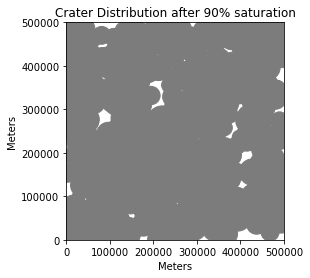

In [234]:
t = 0
i = 0
saturation_list = []
saturation = 0
pixel_count = np.empty([1000])
crat_tot2 = 0
with tqdm(total = 280) as pbar:
    while(saturation < 0.9): # while < 90% saturation
        radius = rand.randint(750, 2000) # this range always produces > 10 km craters
        densities = rand.randint(3000, 4000) # density will range somewhere between near pure ice comets and fully rocky asteroids 
        velocities = rand.randint(11000, 32000)
        mass = ((4/3) * pi * (radius) ** (2)) * (densities)# mass unused in next few calculations
        vel_over_g = (((velocities)**2) / (g)) ** (1 / 4)
        impactor_over_planet = (densities / p_moon) ** (1 / 4)
        crater_diameter = (vel_over_g * impactor_over_planet * ((radius * 2) ** (3 / 4)))
        x = rand.randint(1, 500000) # random x cord
        y = rand.randint(1, 500000) # random y cord
        fig = plt.gcf()
        ax = fig.gca()
        ax.add_patch(plt.Circle((x, y), (crater_diameter / 2), edgecolor='#7d7c7c', facecolor='#7d7c7c')) # add circle to graph

        plt.xlim(0, 500000) # x limit
        plt.ylim(0, 500000) # y limit
        plt.xlabel("Meters")
        plt.ylabel("Meters")
        if (saturation >= .24 and saturation <= .26):
            plt.title('Crater Distribution after 25% saturation')
            ax.set_aspect('equal') # make sure cirlces appear with no eccentricity
            fig.savefig('25%_Earth.png') # save img
        elif(saturation >= .49 and saturation <= .51):
            plt.title('Crater Distribution after 50% saturation')
            ax.set_aspect('equal') # ''
            fig.savefig('50%_Earth.png') # ''
        elif(saturation >= .74 and saturation <= .76):
            plt.title('Crater Distribution after 75% saturation')
            ax.set_aspect('equal') # ''
            fig.savefig('75%_Earth.png') # ''
        elif(saturation >= .89 and saturation <= .91):
            plt.title('Crater Distribution after 90% saturation')
            ax.set_aspect('equal') # ''
            fig.savefig('100%_Earth.png') # ''
        ax.set_aspect('equal')
        # uses pixels to calculate percentage of figure that is covered by craters
        fig.savefig(f'temp.png')
        im = Image.open(f'temp.png')
        pixel_colors = im.getdata()
        crater_pix = 0;
        for x in range(len(pixel_colors)):
            temp = pixel_colors[x][0] * pixel_colors[x][1] * pixel_colors[x][2]
            if (temp == 1922000): # value of r * g * b for hex color #7d7c7c
                crater_pix += 1
        saturation = round(crater_pix / 50000 , 3)
        saturation_list.append(saturation)
        t += 1000 # time step
        i += 1
        crat_tot2 += crater_diameter
        time.sleep(0.001)
        pbar.update(saturation)
crat_avg_e = crat_tot2 / i

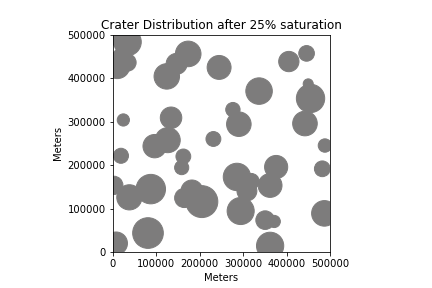

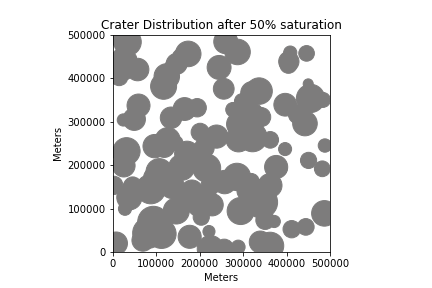

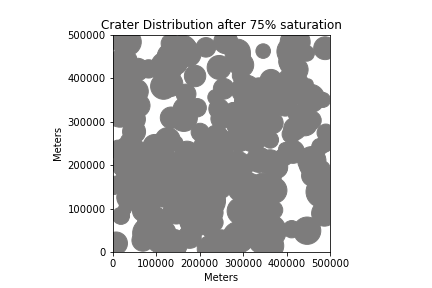

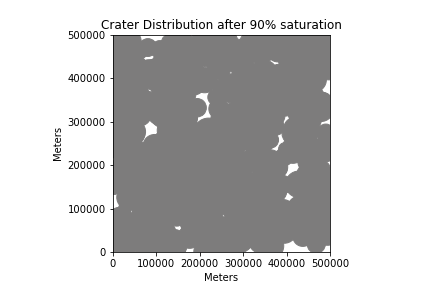

In [235]:
img5 = Image.open('25%_Earth.png')
img6 = Image.open('50%_Earth.png')
img7 = Image.open('75%_Earth.png')
img8 = Image.open('100%_Earth.png')
img5.show()
img6.show()
img7.show()
img8.show()

Time to Saturation: 407000 years 



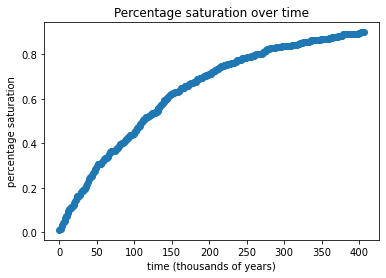

In [236]:
saturation_arr1 = np.array(saturation_list)
plt.scatter(range(int(t / 1000)), saturation_arr1)
plt.xlabel("time (thousands of years)")
plt.ylabel("percentage saturation")
plt.title("Percentage saturation over time")
print(f'Time to Saturation: {t} years \n')

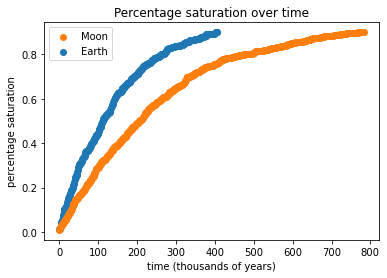

In [237]:
earth = plt.scatter(range(int(t / 1000)), saturation_arr1)
moon = plt.scatter(range(int(t1 / 1000)), saturation_arr)
plt.xlabel("time (thousands of years)")
plt.ylabel("percentage saturation")
plt.title("Percentage saturation over time")
plt.legend([moon, earth], ['Moon', 'Earth'])

Comparing the two graphs, I found it interesting that the moon takes about twice as long to saturate as the earth. My hypothesis is that due to the Earth's higher gravity, and thus higher impact velocities , and under the assumptions I made, an Earth sized planet has larger craters

### Conclusion

One assumption I hadn't forseen was that at the scale of impactors required to produce 10 km or larger craters, drag becomes irrelevent. I found this out after some research. (Source: [amsmeteors.org](https://www.amsmeteors.org/fireballs/faqf/?#:~:text=The%20meteorite%20then%20quickly%20reaches,deceleration%20due%20to%20atmospheric%20drag.))  Still, each impactor results in an, on average, larger crater - As shown by the result below. The average crater size being larger points to my hypothesis being true. 

In [239]:
print(f'Average crater size on the moon = {avg_crat_m:.2f}')
print(f'Average crater size on the Earth = {crat_avg_e:.2f}')

Average crater size on the moon = 36321.42
Average crater size on the Earth = 50060.43


Obviously, there are a few assumptions made that make this a lot more simplistic than it is in reality, but gives an idea of what it would take to produce craters < 10km in diameter on earth. I first attempted to do this where each meteor decelerated all the way to terminal velocity. Once I realized this didn't account for initial velocities, I attempted to do the calculation by using decceleration due to drag but ran into a lot of issues. For one, I kept getting that impactors decelerated by greater than the speed of light in less than a second! After a lot of research I eventually realized that drag becoems irrelevent at these scales. 